In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']},
                  index=[0,1,2,3])

In [3]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4','B5','B6','B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

In [4]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [5]:
#concat : 데이터 병합
#인덱스 번호가 다르면 제대로 병합되지 않는다.
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [6]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [9]:
#inner join
#병합할 데이터의 공통된 인덱스 값만 추출
result = pd.concat([df1,df4],axis=1,join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [10]:
result = pd.concat([df1,df4],axis=1,join_axes=[df1.index])
result

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [11]:
result = pd.concat([df1,df4],axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [13]:
#index값을 무시하고 데이터프레임을 병합
result = pd.concat([df1,df4],ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [15]:
#merge 함수
df5 = pd.DataFrame({'key': ['K0','K2','K3','K4'],
                    'A': ['A0','A1','A2','A3'],
                    'B': ['B0','B1','B2','B3']})

df6 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [17]:
pd.merge(df5,df6,on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


In [ ]:
# how속성
#left, right, outer, inner
pd.merge(df5,df6,how='left',on='key')
#왼쪽의 df5를 기준으로 key칼럼값을 df5는 다 가져오고 df6은 겹치는 값만 가져옴

In [18]:
pd.merge(df5,df6,how='right',on='key')
#df6을 기준으로 key값에서 동일한 값(칼럼 k0..)을 먼저 배치하고 겹치지않는 값은 나중에 배치

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K1,NaN,NaN,C1,D1


In [20]:
pd.merge(df5,df6,how='outer',on='key')
#겹치는 값 먼저 배치 나중에 모든 값 배치

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN
4,K1,NaN,NaN,C1,D1


In [21]:
pd.merge(df5,df6,how='inner',on='key')
#겹치는 값만 배치

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


# 데이터 실습 2015-2017

In [26]:
df2015= pd.read_csv("2015.csv",encoding='euc-kr',index_col='관서명')
df2016= pd.read_csv("2016.csv",encoding='euc-kr',index_col='관서명')
df2017= pd.read_csv("2017.csv",encoding='euc-kr',index_col='관서명')

In [27]:
#범죄증감률 (금년-작년)*100
df2015[df2015['구분']=='발생건수']

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주동부경찰서,발생건수,3,5,92,1100,1155
광주서부경찰서,발생건수,5,10,172,2050,2483
광주남부경찰서,발생건수,1,3,70,962,1081
광주북부경찰서,발생건수,5,14,256,2570,2621
광주광산경찰서,발생건수,4,12,160,1743,2253


In [28]:
#범죄증감률 (금년-작년)*100
df2015[df2015['구분']=='발생건수'].sum(axis=1)

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

In [30]:
#2015총계컬럼 만들기
#발생한 범죄수 모두 더한 값
df2015["2015총계"]=df2015.sum(axis=1)
df2015

,구분,살인,강도,강간·강제추행,절도,폭력,2015총계
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주지방경찰청계,검거건수,18,47,758,5409,8301,14533
광주지방경찰청계,검거인원,17,66,776,3433,11774,16066
광주지방경찰청계,구속,9,33,42,104,58,246
광주지방경찰청계,불구속,1,26,511,2781,5618,8937
광주지방경찰청계,기타,7,7,223,548,6098,6883
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주동부경찰서,검거건수,4,6,86,583,970,1649
광주동부경찰서,검거인원,4,7,98,447,1483,2039


In [44]:
#df2015구분값이 발생건수인 데이터들만 출력
#불리언 인덱싱 활용
s1=df2015[df2015['구분']=='발생건수'].loc[:,'2015총계']

In [45]:
df2016['2016총계']=df2016.sum(axis=1)

In [46]:
s3=df2016[df2016['구분']=='발생건수']['2016총계']

In [47]:
df2015.shape,df2016.shape,df2017.shape

((36, 7), (36, 7), (42, 6))

In [49]:
df2016.index.value_counts()
#중복제거해서 어떤 값이 있는지 보여줌

광주북부경찰서     6
광주광산경찰서     6
광주동부경찰서     6
광주서부경찰서     6
광주지방경찰청계    6
광주남부경찰서     6
Name: 관서명, dtype: int64

In [50]:
df2017.index.value_counts()
#다른 값 찾아서 지우기

광주북부경찰서     6
광주서부경찰서     6
광주광산경찰서     6
광주남부경찰서     6
광주지방경찰청     6
광주동부경찰서     6
광주지방경찰청계    6
Name: 관서명, dtype: int64

In [51]:
#2017에서 광주지방경찰청에 해당하는 index를 모두 삭제
#del은 열 / drop은 행 삭제
df2017.drop('광주지방경찰청').shape

(36, 6)

In [52]:
#변수에 안담으면 사라짐
df2017=df2017.drop('광주지방경찰청')

In [53]:
df2017['2017총계']=df2017.sum(axis=1)
df2017

,구분,살인,강도,강간·강제추행,절도,폭력,2017총계
관서명,,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366,13949
광주지방경찰청계,검거건수,9,32,732,3487,7553,11813
광주지방경찰청계,검거인원,10,61,824,3046,11018,14959
광주지방경찰청계,구속,8,28,71,115,88,310
광주지방경찰청계,불구속,0,26,523,2493,5235,8277
광주지방경찰청계,기타,2,7,230,438,5695,6372
광주동부경찰서,발생건수,3,5,77,624,1090,1799
광주동부경찰서,검거건수,3,5,70,470,953,1501
광주동부경찰서,검거인원,4,4,76,483,1538,2105


In [56]:
s5 = df2017[df2017['구분']=='발생건수']['2017총계']

In [67]:
#증감율 = (금년-작년)/작년*100
#s2=2015-2016증감률
#s4=2016-2017증감율
s2=(s3-s1)/s1*100
s4=(s5-s3)/s3*100
s2

관서명
광주지방경찰청계   -18.130643
광주동부경찰서    -12.186837
광주서부경찰서    -17.542373
광주남부경찰서    -11.903637
광주북부경찰서    -24.112697
광주광산경찰서    -17.473634
dtype: float64

In [68]:
#이름지정
s2.name='2015_2016 증감율'
s4.name='2016_2017 증감율'

In [69]:
#1.데이터 프레임 형성: pd.DataFrame
#2.데이터 프레임 병합: pd.concat

In [70]:
df_all=pd.concat([s1,s2,s3,s4,s5],axis=1)
df_all

,2015총계,2015_2016 증감율,2016총계,2016_2017 증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


In [90]:
df_all2=pd.DataFrame([s1,s2,s3,s4,s5]).T
df_all2

,2015총계,2015_2016 증감율,2016총계,2016_2017 증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830.0,-18.130643,15416.0,-9.516087,13949.0
광주동부경찰서,2355.0,-12.186837,2068.0,-13.007737,1799.0
광주서부경찰서,4720.0,-17.542373,3892.0,-6.526208,3638.0
광주남부경찰서,2117.0,-11.903637,1865.0,-17.050938,1547.0
광주북부경찰서,5466.0,-24.112697,4148.0,-4.893925,3945.0
광주광산경찰서,4172.0,-17.473634,3443.0,-12.285797,3020.0


In [91]:
import matplotlib.pyplot as pit

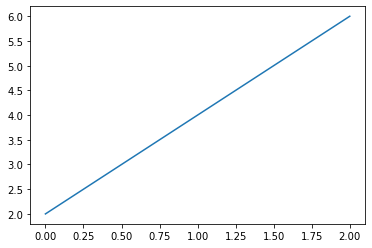

In [93]:
y=[2,4,6]
pit.plot(y)
pit.show()